In [1]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

air = ml.Non_Dispersion(1)
SiO2 = ml.open_material('SiO2_Nanya', 'Material')
NB = ml.open_material('Nb2O5_Nanya', 'Material')
ITO2 = ml.open_material('ITO_Nanya', 'Material')
ITO1 = ml.open_material('ITO1_Nanya', 'Material')
OC = ml.open_material('OC_Nanya', 'Material')
sodalime_Nanya = ml.open_material('sodalime_Nanya', 'Material')

wl = np.linspace(380, 780, 401)
R_scan = pd.read_csv('./spectrum/Nanya/Bonsai_R_5_B.csv')['SCAN'].values

R_hypo = lambda th: tm.Design(
    [air, SiO2, ITO2, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], None]
).reflectance(wl, 5)

fom = lambda th:sum(abs(R_hypo(th)+th[4]-R_scan/100))

In [40]:
sol = differential_evolution(fom, [(68,80),(28,32),(38,50),(6,10),(-0.1,0.1)])
print(sol.x)

[7.35402506e+01 3.19913822e+01 3.80084264e+01 6.00079427e+00
 5.27395131e-03]


In [45]:
sol2 = minimize(fom, sol.x)
print(sol2.x)

[7.35402506e+01 3.19913822e+01 3.80084264e+01 6.00079427e+00
 5.27395131e-03]


0.020157629859986342


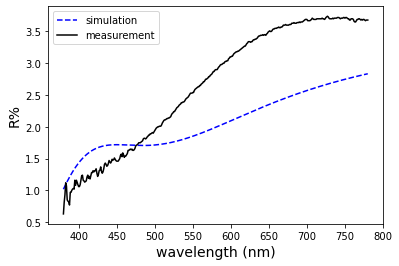

In [17]:
m1 = [70, 28, 39, 5]
m2 = [75, 30, 45, 8]
m3 = [76, 30, 45.3, 7.8]
tk = m3
plt.plot(wl, 100*R_hypo(tk), '--b', label = 'simulation')
plt.plot(wl, R_scan, '-k', label = 'measurement')
plt.legend(loc = 'best')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
#plt.savefig('Nanya_Bonsai_reflection_blacktap_origin.png')
print((sum((100*R_hypo(tk)-R_scan)**2)**.5)/301/np.mean(R_scan))
plt.show()